In [2]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\major\\data and Py files\\mbti.csv')
print(df.head(10))
print("*"*40)
print(df.info())
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB
None
   type                                              posts  words_per_comment
0  INFJ  'http://ww

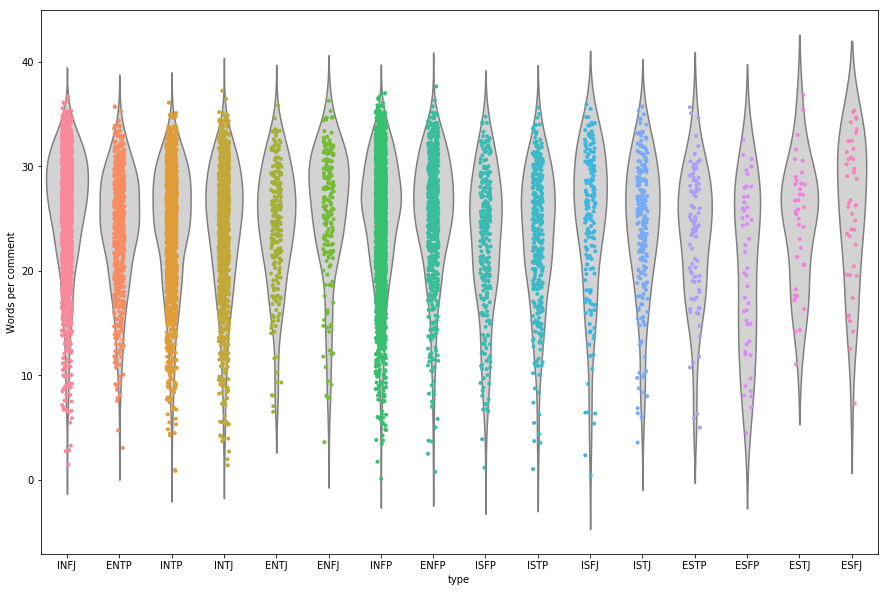

In [3]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [4]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)


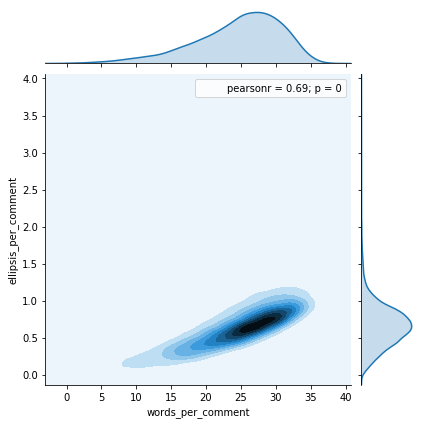

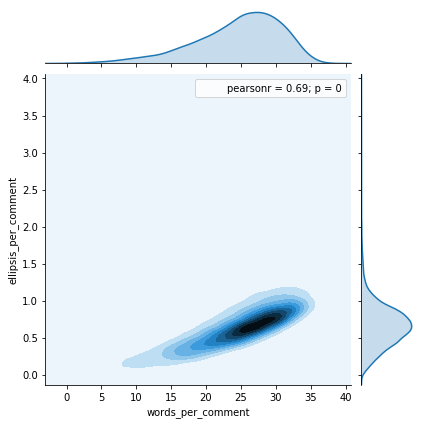

In [6]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')
plt.show()

0.639982031954
0.705411470476
0.64174171
0.741836096777
0.742380486427
0.67013709309
0.72235984125
0.64210438311
0.723912910693
0.730584542199
0.760423088099
0.697464249908
[0.76042308809885495, 0.74238048642734933, 0.74183609677657891, 0.73058454219891589, 0.72391291069304586, 0.72235984124959429, 0.70541147047609076, 0.69746424990765787, 0.6701370930896875, 0.64210438310988005, 0.64174170999952718, 0.6399820319539542]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


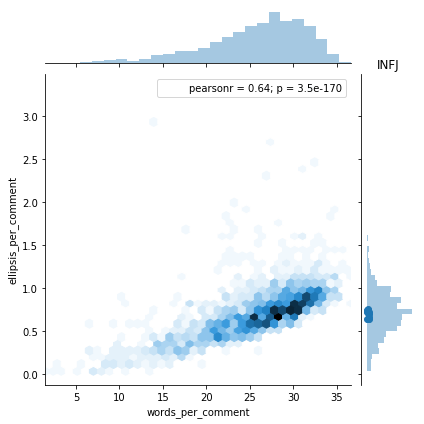

In [7]:
i = df['type'].unique()
k = 0
for m in range(0,1):
    for n in range(0,1):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1
        
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)
plt.show()

In [9]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

In [10]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

(8675,)
(8675, 7)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test,y_test) * 100, 2)
print(round(acc_sgd,2,), "%")

14.29 %


In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")


20.74 %


In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(round(acc_log,2,), "%")


24.31 %


In [39]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print(yy.shape)
print(XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

sgdd = SGDClassifier(max_iter=5, tol=None)
sgdd.fit(XX_train, yy_train)
Y_predd = sgdd.predict(XX_test)
sgdd.score(XX_train, yy_train)
acc_sgdd = round(sgdd.score(XX_test, yy_test) * 100, 2)
print(round(acc_sgdd,2,), "%")


(8675,)
(8675, 10)
66.94 %


In [40]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_test, yy_test) * 100, 2)
print(round(acc_random_forestt,2,), "%")


76.04 %


In [42]:
logreg = LogisticRegression()
logreg.fit(XX_train, yy_train)

Y_pred = logreg.predict(XX_test)

acc_log = round(logreg.score(XX_test, yy_test) * 100, 2)
print(round(acc_log,2,), "%")

77.3 %
